<a href="https://colab.research.google.com/github/Valeria-YL/2047880MINERIA/blob/main/Practicas/Practica_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text analysis** Word Cloud

In [1]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Download latest version
path = kagglehub.dataset_download("sumedh1507/blood-donor-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(os.path.join(path, "blood_donor_dataset.csv"))

Path to dataset files: /root/.cache/kagglehub/datasets/sumedh1507/blood-donor-dataset/versions/1


Usare la columna 'city' (ciudad) para visulizar la distribución geografica de los donantes.

Primero unimos todos los valores de la columna 'city' en una sola cadena de texto.

In [2]:
text_data = df['city'].astype(str).str.cat(sep=' ')

In [3]:
#Creamos la Nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis',
    stopwords={'City', 'city', 'and', 'the', 'of'}
).generate(text_data)

Text(0.5, 1.0, 'Nube de Palabras de Ciudades de Donantes de Sangre')

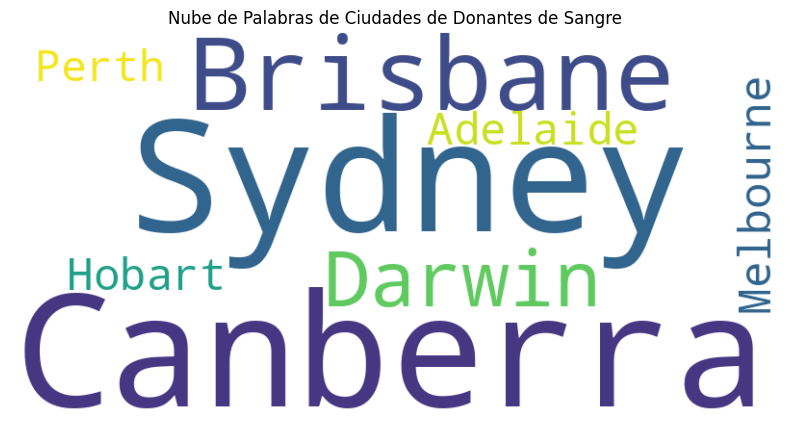

In [4]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de Ciudades de Donantes de Sangre")

Podemos ver la densidad de la población de donantes se concentran principalemente en Sydney y Canberra, ya que sus nombres son los más grandes.

Ahora usare la nube de palabras para analizar la distribución de los grupos sanguíneos (blood_group).

Vamos a reemplazar los signos (+ y -) por texto (POS y NEG).


In [5]:
df['blood_group_cleaned'] = df['blood_group'].str.replace('+', '_POS', regex=False)
df['blood_group_cleaned'] = df['blood_group_cleaned'].str.replace('-', '_NEG', regex=False)

In [6]:
#unimos los tipos de sangre
text_data_blood = df['blood_group_cleaned'].astype(str).str.cat(sep=' ')

In [7]:
wordcloud_blood = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=8,
    colormap='RdYlBu',
    collocations=False,
).generate(text_data_blood)

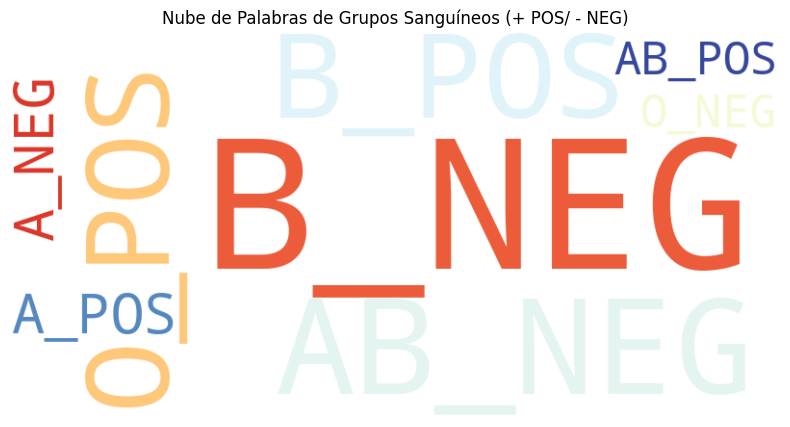

In [8]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_blood, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de Grupos Sanguíneos (+ POS/ - NEG)")
plt.show()

El grupo sanguíneo con mayor cantidad de donantes registrados es B- (B_NEG), otros grupos como B+ , A+ y AB- tienen tamaños intermedios.

Para confirmar que la visualización refleja correctamente la frecuencia de los grupos sanguíneos usamos ```value_counts()```



In [9]:
blood_counts = df['blood_group'].value_counts()

print(blood_counts)

blood_group
B-     1290
AB-    1284
B+     1282
O+     1240
A+     1238
A-     1236
AB+    1219
O-     1211
Name: count, dtype: int64
